# MM20B007 : Data Analytics Lab Assignment 1

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Getting necessary packages

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Reading the data

In [130]:
mdf = pd.read_csv('/content/drive/MyDrive/sem 7/EE5708/Assignment 1/Data/merged_data.csv', index_col = 0)

Visualizing the data

In [131]:
mdf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


## Preprocessing and Data Cleaning

In [132]:
mdf.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

Dropping unwanted columns

In [133]:
mdf.drop(['fips_x', 'fips_y'], axis = 1, inplace = True)
mdf.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [134]:
mdf.shape

(3134, 23)

In [135]:
df = mdf.copy()

In [136]:
df[['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']].mean()

Med_Income           46819.837855
Med_Income_White     49490.181992
Med_Income_Black     34750.214137
Med_Income_Nat_Am    43309.998643
Med_Income_Asian     65412.969499
Hispanic             41118.231553
dtype: float64

Function to plot distributions as subplots

In [137]:
def dist_plot(features, rows, cols, data, figsize=(10, 7)):
    """
    Plot distributions of features in subplots and display the mean value in each subplot.

    Parameters:
        features (list): List of feature names to plot.
        rows (int): Number of subplot rows.
        cols (int): Number of subplot columns.
        data (DataFrame): The data containing the features.
        figsize (tuple): Figure size (width, height).

    Returns:
        None
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True, sharey=True)

    # Flatten the 2D array of subplots for easier iteration
    for i, ax in enumerate(axes.flatten()):
        feature_name = features[i]
        feature_data = data[feature_name]

        # Plot the distribution using Seaborn
        sns.distplot(feature_data, ax=ax)

        # Set title for the subplot
        ax.set_title(feature_name)

        # Get the KDE line and calculate mean height
        kde_line = ax.lines[0]
        mean = feature_data.mean()
        xs = kde_line.get_xdata()
        ys = kde_line.get_ydata()
        height = np.interp(mean, xs, ys)

        # Add a vertical line at the mean and fill area under the KDE curve
        ax.vlines(mean, 0, height, color='crimson', linestyle=':')
        ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)

        # Add text to display the mean value
        ax.text(0.75, 0.9, "Mean: {:.2f}".format(mean),
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes)

    plt.tight_layout()
    plt.show()

<ipython-input-137-ddcc233c517a>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_data, ax=ax)
<ipython-input-137-ddcc233c517a>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_data, ax=ax)
<ipython-input-137-ddcc233c517a>:23: UserWarning: 

`distplot` is a deprecated function 

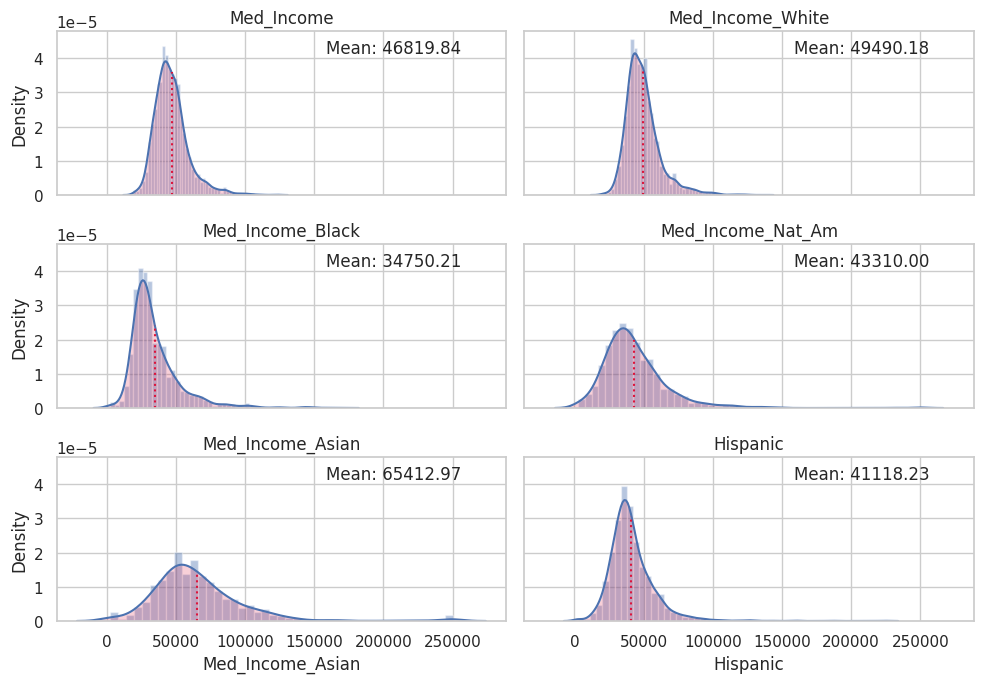

In [138]:
income = ['Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']
dist_plot(income, 3, 2, df)

These graphs show that different social groups have different mean incomes for other states; hence, if we can prove that the median income is a valid factor in determining the average annual incidence or death, we can also assume that socioeconomic status would be a valid factor!

Checking the number of null values in each of the features

In [139]:
mdf.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

The columns 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', and 'Hispanic' have too many null values hence we will be dropping them.

In [140]:
df.drop(['Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic'], axis = 1, inplace = True)

Checking, what all columns have numeric data type

In [141]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

State                False
AreaName             False
All_Poverty           True
M_Poverty             True
F_Poverty             True
FIPS                  True
Med_Income           False
M_With                True
M_Without             True
F_With                True
F_Without             True
All_With              True
All_Without           True
Incidence_Rate       False
Avg_Ann_Incidence    False
recent_trend         False
Mortality_Rate       False
Avg_Ann_Deaths       False
dtype: bool

In [142]:
df.describe()

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without
count,3.134000e+03,3134.000000,3134.000000,3134.000000,3133.000000,3.134000e+03,3134.000000,3.134000e+03,3134.000000,3.134000e+03,3.134000e+03
mean,1.522966e+04,6828.800893,8400.855775,30426.019145,46819.837855,4.158963e+04,6930.955329,4.487357e+04,5968.701021,8.646320e+04,1.289966e+04
std,5.457122e+04,24719.078097,29865.855831,15124.491165,12246.380184,1.293894e+05,28686.089548,1.406455e+05,24657.276997,2.699985e+05,5.331494e+04
min,1.000000e+01,5.000000,5.000000,1001.000000,19328.000000,3.200000e+01,4.000000,3.300000e+01,4.000000,6.700000e+01,8.000000e+00
25%,1.731250e+03,758.750000,957.000000,19001.500000,38826.000000,4.506750e+03,750.000000,4.657500e+03,633.000000,9.173500e+03,1.388250e+03
50%,4.294000e+03,1925.000000,2372.000000,29180.000000,45075.000000,1.040450e+04,1763.000000,1.110800e+04,1529.000000,2.144800e+04,3.323500e+03
75%,1.034550e+04,4697.500000,5812.500000,45080.500000,52224.000000,2.788775e+04,4407.250000,2.976475e+04,3834.000000,5.756150e+04,8.240000e+03
max,1.800265e+06,823612.000000,976653.000000,56045.000000,123453.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06


Thus we can see we have to treat the columns [Incidence_Rate, Avg_Ann_Incidence, recent_trend, Mortality_Rate, Avg_Ann_Deaths] for values that are not numeric.

Also, we can see, all the independent columns are not normalized by population and we also do not have population data, it is better to delete the Mortality rate and Incidence rate columns as these are just the average values normalized by population and hence can be dropped !!

In [143]:
df.drop(['Mortality_Rate', 'Incidence_Rate'], axis = 1, inplace = True)

In [144]:
# we create a filter to convert the non-numeric data to either numeric or to replace by NULL
def filter_(x):
    try:
        return float(str(x).split(' ')[0])
    except ValueError:
        return float('NaN')

In [145]:
# Using the filter on different columns
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].map(filter_)

df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].map(filter_)
df['Med_Income'] = df['Med_Income'].map(filter_)

In [146]:
print([i for i in df['Avg_Ann_Incidence'].unique() if type(i)==str])
print([i for i in df['Avg_Ann_Deaths'].unique() if type(i)==str])

[]
[]


In [147]:
# creating columns with Rising and falling !!

def boo(col, chck):
    if col == chck:
        return 1
    return 0

df['Rising'] = df['recent_trend'].apply(lambda x: boo(x, 'rising'))
df['Falling'] = df['recent_trend'].apply(lambda x: boo(x, 'falling'))

In [148]:
df.select_dtypes(include=np.number)

,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
0,553,334,219,2013,61518.0,876,1317,566,540,1442,1857,3.0,NaN,0,0
1,499,273,226,2016,84306.0,2470,769,1707,564,4177,1333,3.0,NaN,0,0
2,23914,10698,13216,2020,78326.0,120747,23245,122426,21393,243173,44638,131.0,96.0,0,0
3,4364,2199,2165,2050,51012.0,6396,2708,6627,1774,13023,4482,6.0,5.0,0,0
4,69,33,36,2060,79750.0,419,124,349,67,768,191,3.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,5058,2177,2881,56037,69022.0,19891,3318,18600,2683,38491,6001,14.0,9.0,0,0
3130,1638,1026,612,56039,75325.0,8948,2558,9555,1192,18503,3750,5.0,5.0,0,0
3131,2845,1453,1392,56041,56569.0,9132,1413,8711,1503,17843,2916,6.0,4.0,0,0
3132,1137,489,648,56043,47652.0,3349,691,3490,703,6839,1394,6.0,5.0,0,0


In [149]:
#checking for null values post the pre-processing
df.isnull().sum()

State                  0
AreaName               0
All_Poverty            0
M_Poverty              0
F_Poverty              0
FIPS                   0
Med_Income             1
M_With                 0
M_Without              0
F_With                 0
F_Without              0
All_With               0
All_Without            0
Avg_Ann_Incidence    209
recent_trend           0
Avg_Ann_Deaths       331
Rising                 0
Falling                0
dtype: int64

In [150]:
#Checking for mean values for different features, grouped by state
df.groupby(['State']).mean()

<ipython-input-150-94714262a348>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['State']).mean()


,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Avg_Ann_Incidence,Avg_Ann_Deaths,Rising,Falling
State,,,,,,,,,,,,,,,
AK,2978.782609,1425.260870,1553.521739,2138.217391,66812.565217,12366.565217,2917.739130,12147.608696,2411.217391,24514.173913,5328.956522,15.130435,19.833333,0.000000,0.000000
AL,13242.686567,5740.791045,7501.895522,1067.000000,37973.134328,29389.671642,4678.328358,32530.134328,4294.194030,61919.805970,8972.522388,59.597015,47.552239,0.000000,0.074627
AR,7381.920000,3303.280000,4078.640000,5075.000000,36626.480000,16012.226667,2881.893333,17237.906667,2603.880000,33250.133333,5485.773333,35.733333,28.546667,0.000000,0.040000
AZ,78712.666667,36501.133333,42211.533333,4013.866667,43252.200000,178389.533333,35436.066667,191685.466667,30056.200000,370075.000000,65492.266667,252.600000,91.214286,0.066667,0.133333
CA,105778.310345,48712.758621,57065.551724,6058.000000,56013.155172,269831.241379,52388.275862,287728.534483,43712.500000,557559.775862,96100.775862,294.396552,165.603774,0.000000,0.258621
CO,10218.265625,4729.312500,5488.953125,8062.234375,51263.187500,34745.546875,5534.781250,36322.625000,4447.265625,71068.171875,9982.046875,35.281250,39.075000,0.015625,0.062500
CT,45793.875000,20125.000000,25668.875000,9008.000000,71184.125000,194827.125000,19867.500000,212544.125000,15086.125000,407371.250000,34953.625000,332.875000,216.875000,0.000000,0.375000
DC,110365.000000,48069.000000,62296.000000,11001.000000,70848.000000,276285.000000,22198.000000,323314.000000,14813.000000,599599.000000,37011.000000,351.000000,240.000000,0.000000,0.000000
DE,36105.000000,15373.000000,20732.000000,10003.000000,58067.666667,132112.666667,13828.000000,146781.000000,11207.666667,278893.666667,25035.666667,257.666667,188.333333,0.000000,0.000000


<ipython-input-151-4e706e5e56c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


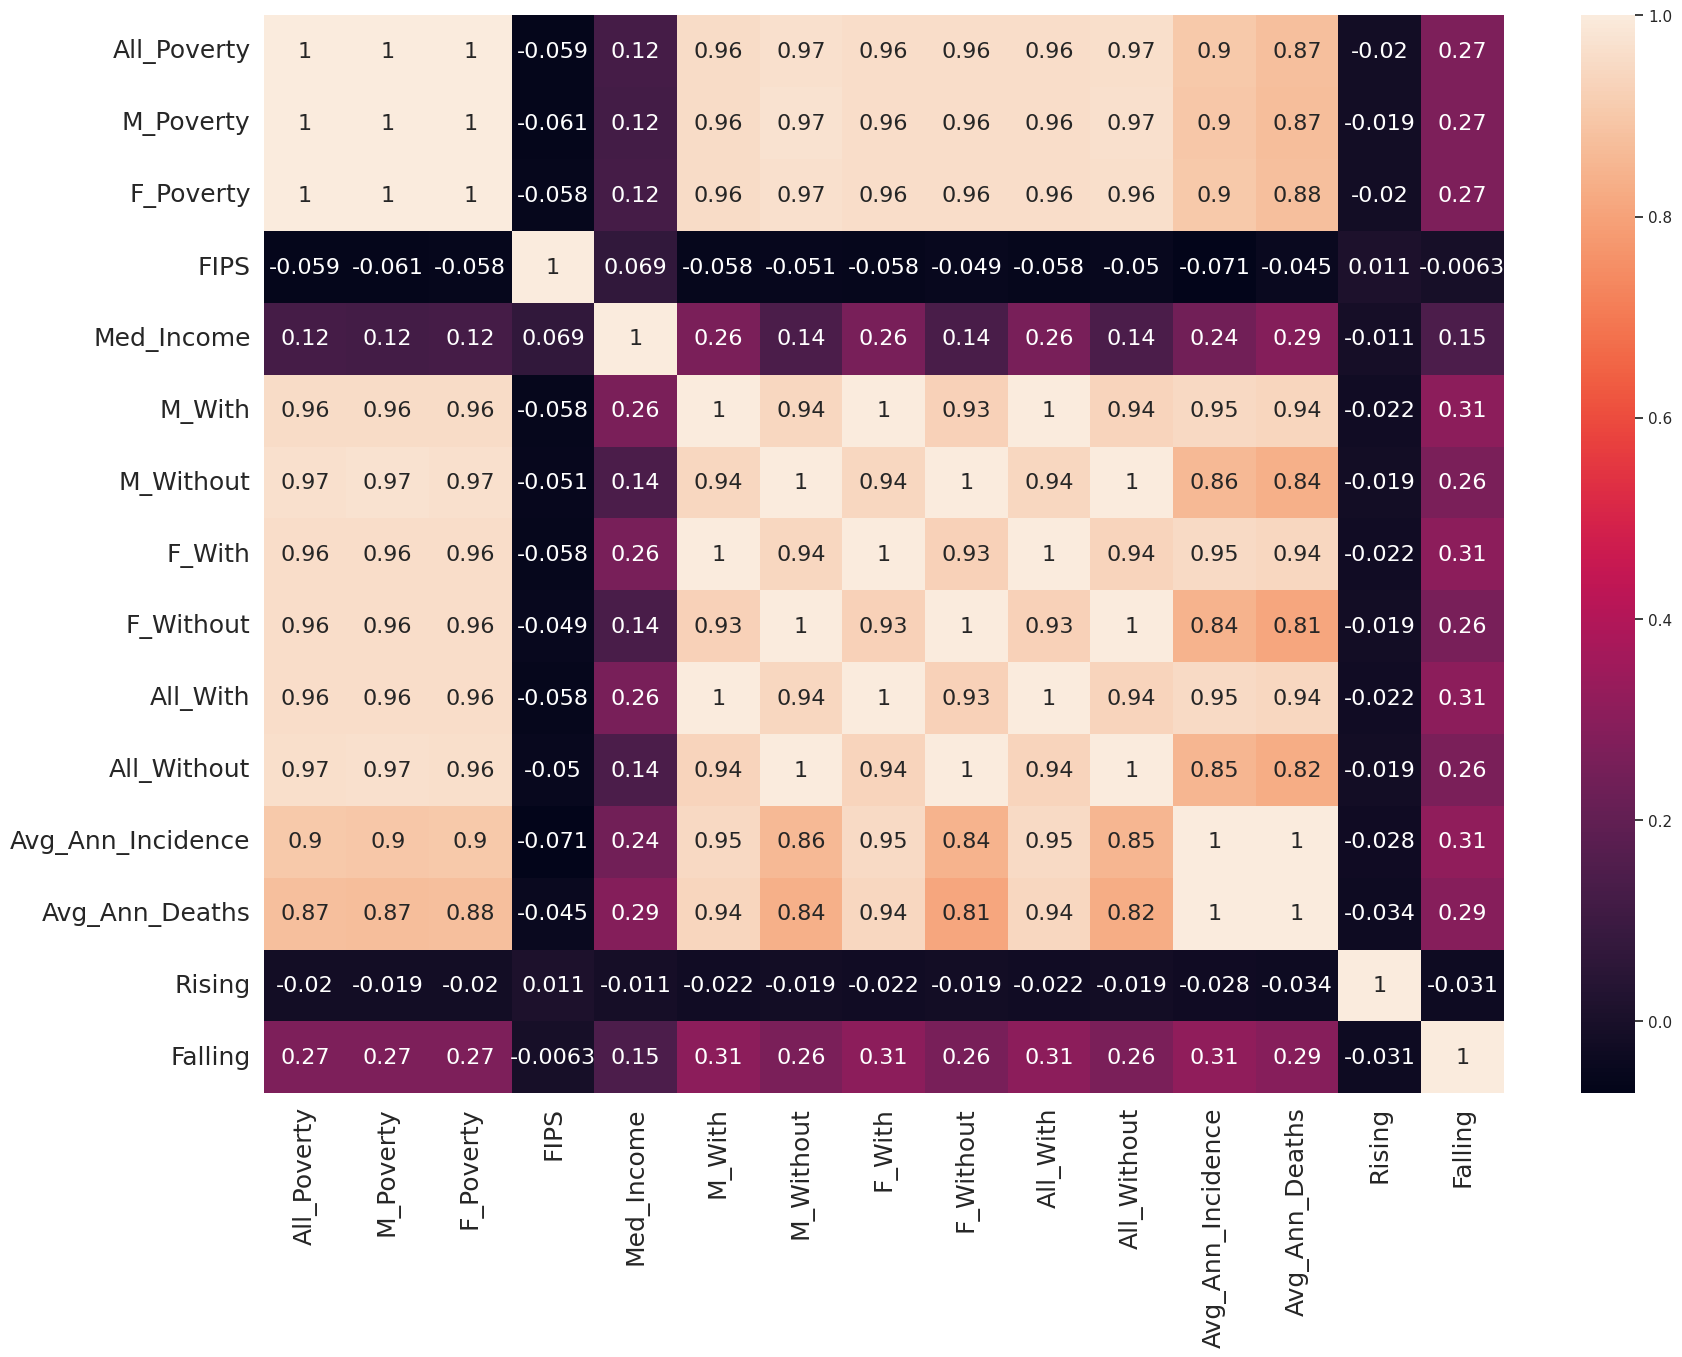

In [151]:
plt.figure(figsize=(20, 14))
corr_matrix = df.corr()
annot_kws = {"size": 16}

# Create the heatmap of Correlation matrix
heatmap = sns.heatmap(corr_matrix, annot=True, annot_kws=annot_kws, xticklabels=True, yticklabels=True)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [152]:
#Converting the Median Income column to numeric type
df['Med_Income'] = pd.to_numeric(df.Med_Income)

In [153]:
# Checks what all columns in the dataframe contain only numeric values
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

State                False
AreaName             False
All_Poverty           True
M_Poverty             True
F_Poverty             True
FIPS                  True
Med_Income           False
M_With                True
M_Without             True
F_With                True
F_Without             True
All_With              True
All_Without           True
Avg_Ann_Incidence    False
recent_trend         False
Avg_Ann_Deaths       False
Rising                True
Falling               True
dtype: bool

## Visualization

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

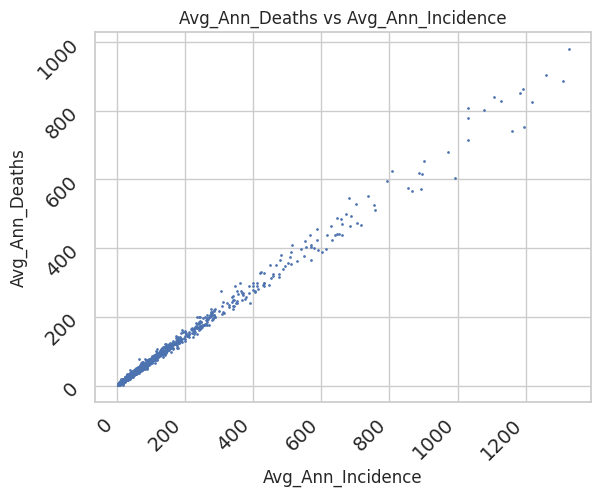

In [154]:
# Scatter plot Avg_Ann_Incidence vs Avg_Ann_Deaths
df.plot(x = 'Avg_Ann_Incidence', y = 'Avg_Ann_Deaths', kind= 'scatter', s=0.9)
plt.grid(True)
plt.title('Avg_Ann_Deaths vs Avg_Ann_Incidence')
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(rotation=45, ha="right", fontsize=14)

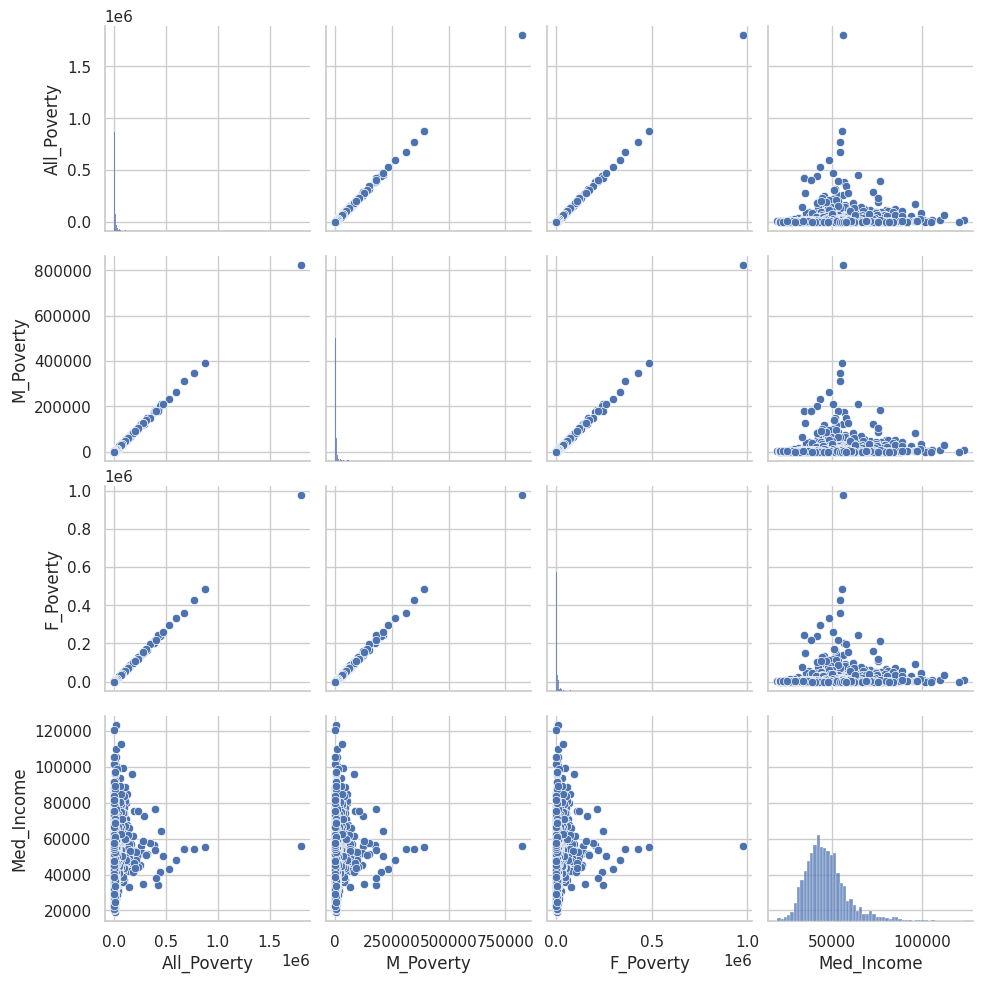

In [155]:
# Pair Plots
sns.set(style='whitegrid', context='notebook')

columns = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income']

pairplot = sns.pairplot(df[columns])

# pairplot.fig.suptitle('Pairplot of Poverty and Median Income', y=1.08, fontsize=16)
plt.show()

In [156]:
df.drop(['M_With', 'M_Without', 'F_With', 'F_Without'], axis=1, inplace=True)

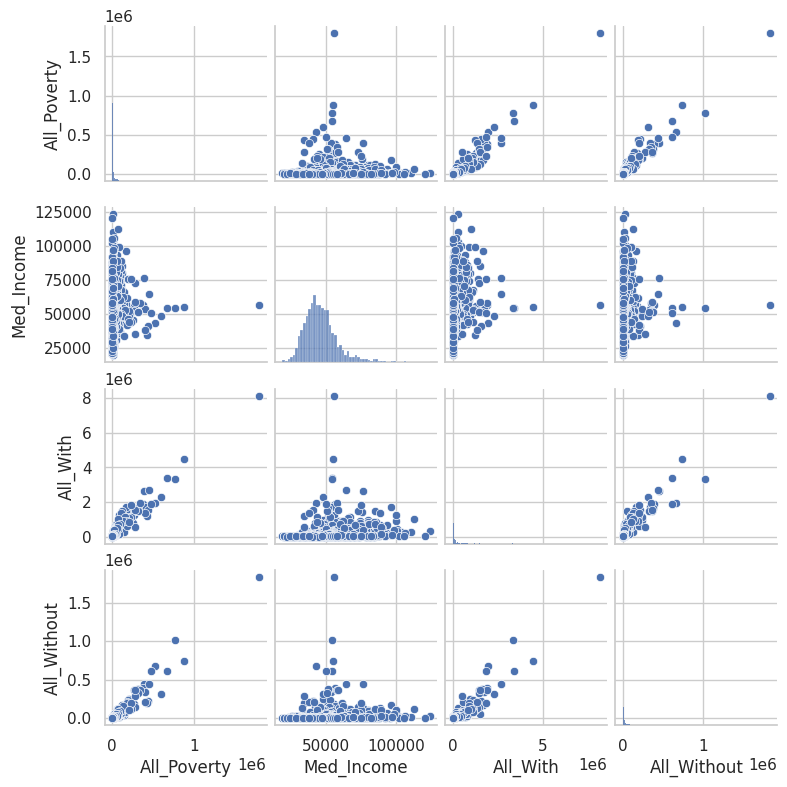

In [157]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[['All_Poverty', 'Med_Income', 'All_With',
       'All_Without']], height=2)

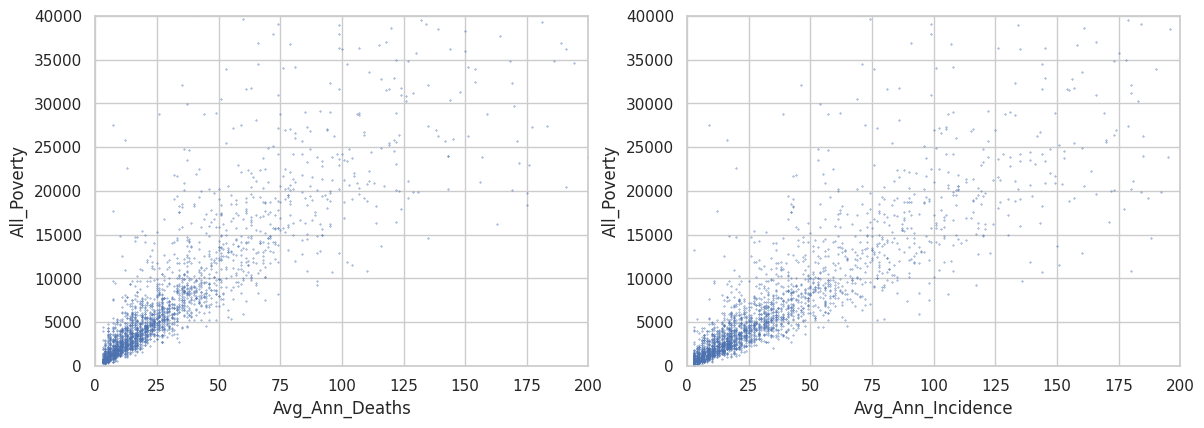

In [158]:
# Scatter Plot
def visualize_scatter_pov(col):
    fig1 = plt.figure(figsize = (14,10))

    ax3 = fig1.add_subplot(223)
    df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter', s=0.1, xlim = [0, 200], ylim = [0, 40000], ax = ax3)
    ax4 = fig1.add_subplot(224)
    df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 200], ylim = [0, 40000], ax = ax4)

visualize_scatter_pov('All_Poverty')

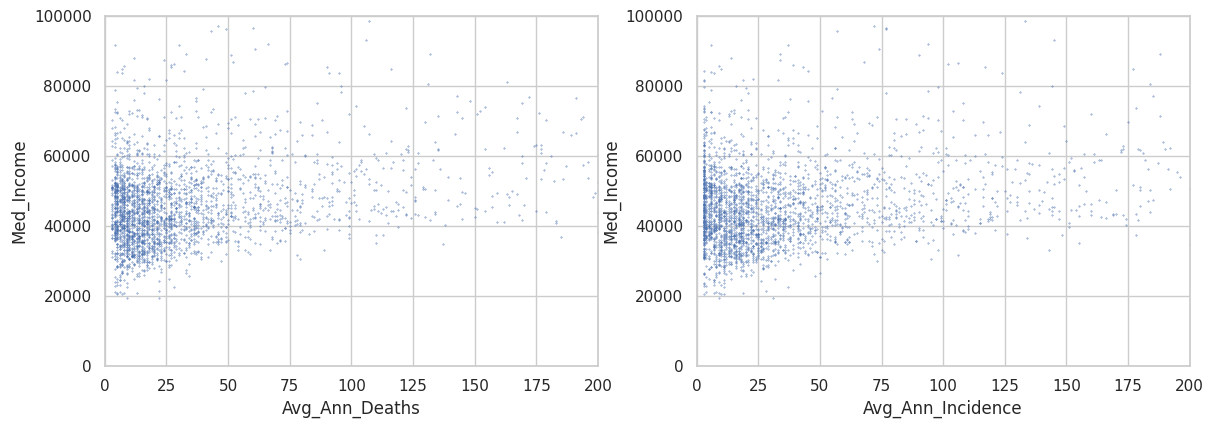

In [159]:
def visualize_scatter_inc(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 200], ylim = [0, 100000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 200], ylim = [0, 100000], ax = ax4)

visualize_scatter_inc('Med_Income')

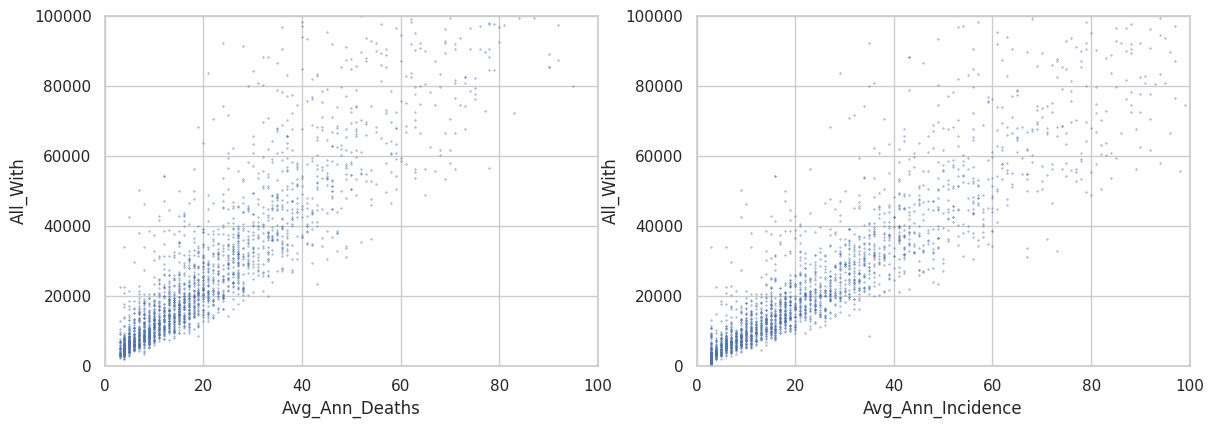

In [160]:
def visualize_scatter_with(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 100], ylim = [0, 100000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 100], ylim = [0, 100000], ax = ax4)

visualize_scatter_with('All_With')

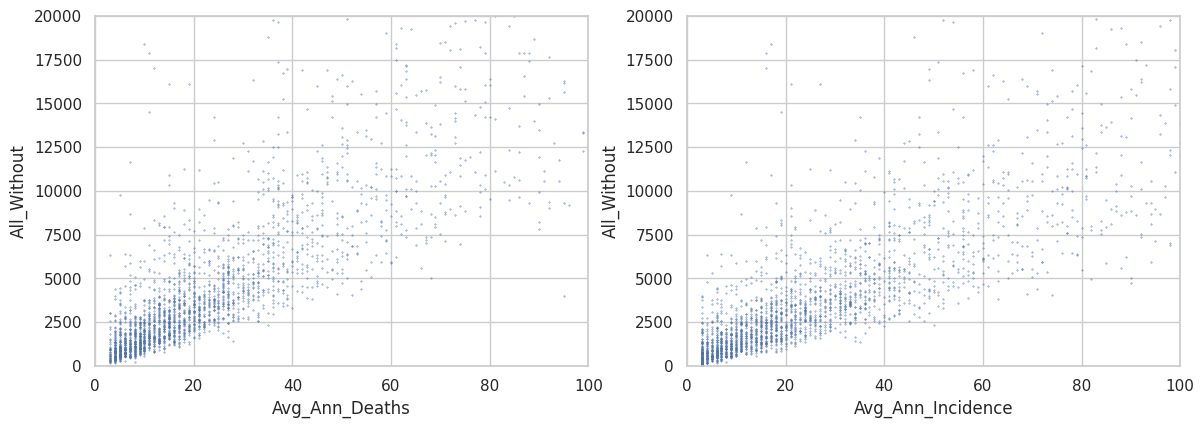

In [161]:
def visualize_scatter_without(col):
    fig1 = plt.figure(figsize = (14,10))
    ax3 = fig1.add_subplot(223)
    df.plot(x = 'Avg_Ann_Deaths', y = col, kind= 'scatter',xlim = [0, 100], ylim = [0, 20000], s=0.1, ax = ax3)
    ax4 = fig1.add_subplot(224)
    df.plot(x = 'Avg_Ann_Incidence', y = col, kind= 'scatter', s=0.1,xlim = [0, 100], ylim = [0, 20000], ax = ax4)

visualize_scatter_without('All_Without')

## Statistical Linear Regression Modelling using Statsmodel Library

Unlike SKLearn, statsmodels does not automatically include a constant term when fitting models. Therefore, to incorporate a constant term, you should utilize the method sm.add_constant(X) within statsmodels. This addition of a constant term, although not obligatory, significantly enhances the quality of the fitted line. For instance, if your original line has an intercept of -2000 and you attempt to fit the same line through the origin, the resulting line will be of lower quality. However, upon introducing a constant term (intercept), you will observe that the coefficients align between SKLearn and statsmodels.

In [162]:
res = ''
for i in df.columns:
    res += str(i) + ' + '
print(res)

State + AreaName + All_Poverty + M_Poverty + F_Poverty + FIPS + Med_Income + All_With + All_Without + Avg_Ann_Incidence + recent_trend + Avg_Ann_Deaths + Rising + Falling + 


In [163]:
# Using statmodels library for Linear Regression Modelling
model1 = smf.ols(formula='Avg_Ann_Incidence ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Ann_Incidence   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5707.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:53:57   Log-Likelihood:                -15493.
No. Observations:                2924   AIC:                         3.100e+04
Df Residuals:                    2917   BIC:                         3.104e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.8125      3.931      9.365      

In [164]:
# Fitting to Average Deaths
model2 = smf.ols(formula='Avg_Ann_Deaths ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Avg_Ann_Deaths   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3900.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:53:58   Log-Likelihood:                -13688.
No. Observations:                2803   AIC:                         2.739e+04
Df Residuals:                    2796   BIC:                         2.743e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.0356      2.701     12.233      

## Multicollinearity

In [165]:
# Importing VIF to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [166]:
X = df[[ 'All_Poverty',  'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling', 'Avg_Ann_Incidence']]

In [167]:
X.dropna(inplace=True)

<ipython-input-167-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [168]:
X1 = X[['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising',
       'Falling']]

In [169]:
# Getting the VIFs corresponding to each of the features and then treating the one with the highest value
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,All_Poverty,25.654166
1,Med_Income,1.271954
2,All_With,15.627624
3,All_Without,16.031002
4,Rising,1.015347
5,Falling,1.201154


The model's performance is impacted by considerable multicollinearity, evident from the elevated value of the variable's VIF (Variance Inflation Factor). This situation could potentially result in coefficients that lack statistical significance.

In [170]:
X.drop('All_Poverty', axis = 1, inplace=True)
X1.drop('All_Poverty', axis = 1, inplace=True)

<ipython-input-170-5a3ca0a533f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('All_Poverty', axis = 1, inplace=True)
<ipython-input-170-5a3ca0a533f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop('All_Poverty', axis = 1, inplace=True)


In [171]:
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,Med_Income,1.265045
1,All_With,9.776656
2,All_Without,8.926300
3,Rising,1.015175
4,Falling,1.199055


In [172]:
X.drop('All_Without', axis = 1, inplace=True)
X1.drop('All_Without', axis = 1, inplace=True)

<ipython-input-172-97aa2e8cd206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('All_Without', axis = 1, inplace=True)
<ipython-input-172-97aa2e8cd206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop('All_Without', axis = 1, inplace=True)


In [173]:
pd.DataFrame([[var, variance_inflation_factor(X1.values, X1.columns.get_loc(var))] for var in X1.columns],
                   index=range(X1.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,Med_Income,1.207631
1,All_With,1.257105
2,Rising,1.015051
3,Falling,1.193283


In [174]:
# Final model after treating for multicollinearity
model1 = smf.ols(formula='Avg_Ann_Incidence ~Med_Income  + All_With + Rising + Falling', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Ann_Incidence   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     7020.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:53:58   Log-Likelihood:                -15759.
No. Observations:                2924   AIC:                         3.153e+04
Df Residuals:                    2919   BIC:                         3.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4731      3.875      6.315      0.0

## Detecting Outliers

In [175]:
data_mod1 = df.copy()
#using IQR method
dat = data_mod1['Med_Income']
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (dat >= Q1 - 3 * IQR) & (dat <= Q3 + 3 *IQR)
data_mod1 = data_mod1.loc[filter]
print(data_mod1.shape)

(3112, 14)


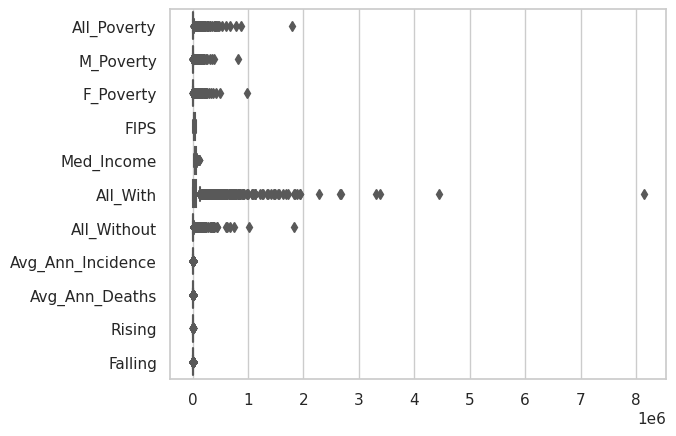

In [176]:
# Boxplot for the initial data
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [177]:
# Fitting to Average Deaths
model2 = smf.ols(formula='Avg_Ann_Deaths ~ All_Poverty + Med_Income  + All_With + All_Without + Rising + Falling', data=data_mod1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Avg_Ann_Deaths   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     4089.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:53:58   Log-Likelihood:                -13494.
No. Observations:                2782   AIC:                         2.700e+04
Df Residuals:                    2775   BIC:                         2.704e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.2407      2.773     11.628      

In [178]:
data_mod1 = df.copy()
for i in ['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling']:
    #using IQR method
    dat = data_mod1[i]
    Q1 = dat.quantile(0.25)
    Q3 = dat.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.

    filter = (dat >= Q1 - 3 * IQR) & (dat <= Q3 + 3 *IQR)
    data_mod1 = data_mod1.loc[filter]
    print(data_mod1.shape)

(2875, 14)
(2855, 14)
(2730, 14)
(2671, 14)
(2631, 14)
(2527, 14)


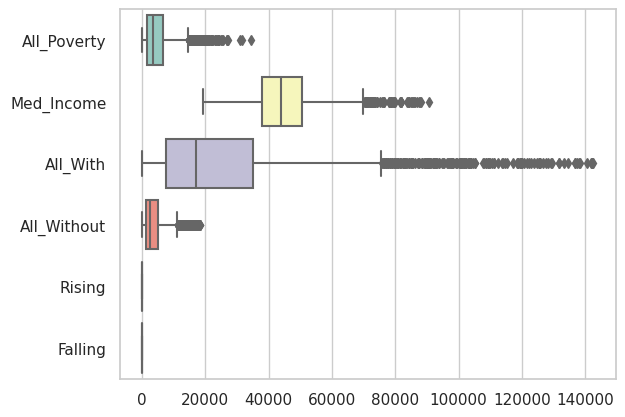

In [179]:
# Boxplot for the filtered data
ax = sns.boxplot(data=data_mod1[['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Rising', 'Falling']], orient="h", palette= 'Set3')

In [190]:
fin_df = data_mod1
# Fitting to Average Deaths
model1 = smf.ols(formula='Avg_Ann_Incidence ~Med_Income  + All_With + Rising + Falling', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Ann_Incidence   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     7020.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:12:47   Log-Likelihood:                -15759.
No. Observations:                2924   AIC:                         3.153e+04
Df Residuals:                    2919   BIC:                         3.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4731      3.875      6.315      0.0

## Normality of Errors

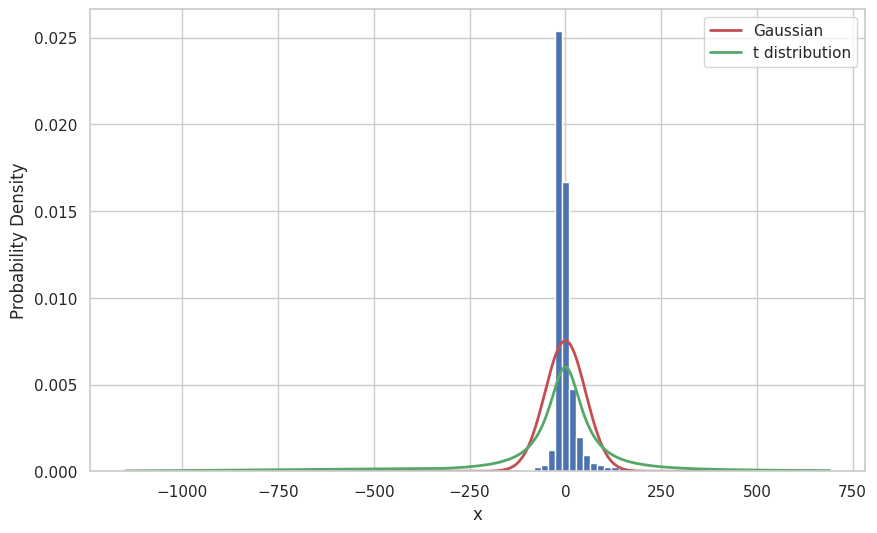

In [191]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(model1.resid)
sigma = np.std(model1.resid)
pdf = stats.norm.pdf(sorted(model1.resid), mu, sigma)
pdf2 = stats.t.pdf(sorted(model1.resid), df = 1, loc = mu, scale=sigma,)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.hist(model1.resid, bins=100, density= True)
plt.plot(sorted(model1.resid), pdf, color='r', linewidth=2, label = 'Gaussian')
plt.plot(sorted(model1.resid), pdf2, color='g', linewidth=2, label = 't distribution')
plt.legend()
plt.show()

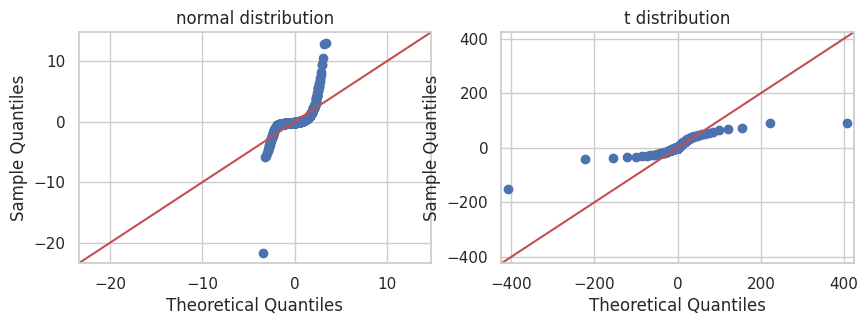

In [192]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
sm.qqplot(model1.resid, stats.norm, fit=True, line='45', ax=ax1)
ax1.set_title("normal distribution")
sm.qqplot(model1.resid, stats.t, fit=True, line='45', ax = ax2)
ax2.set_title("t distribution")

plt.show()

As we can see that the QQ plot for the normal distribution is not close to the straight line at the ends and it deviates to the top at the right and to the bottom at the left, we can say that the tails for the residuals are heavier than a normal distribution, hence on following that I tried using a t distribution, which gives a much better QQ plot and hence we can confirm that the residuals come from the t distribution !! Fatter tails suggest we have more number of outliers !

## Heteroscedasticity

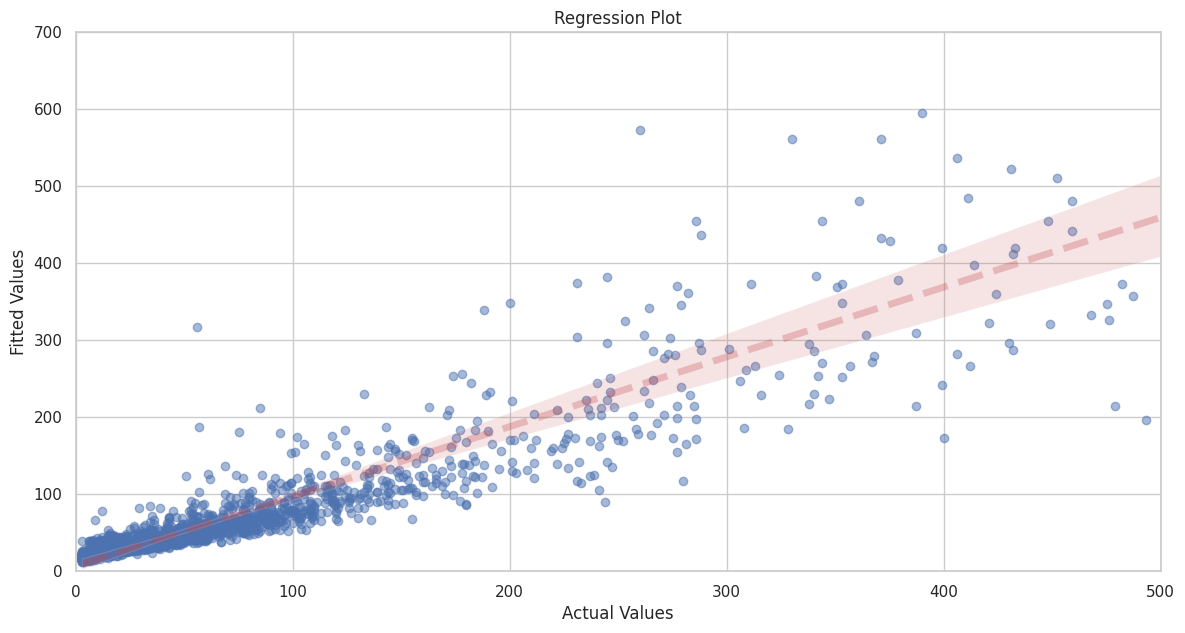

Pearson R:  PearsonRResult(statistic=0.9517556839499244, pvalue=0.0)


In [196]:
plt.figure(figsize=(14,7))
sns.regplot(x = X['Avg_Ann_Incidence'], y = model1.fittedvalues, line_kws={'color':'r', 'alpha':0.3,
                                              'linestyle':'--', 'linewidth':5},
            scatter_kws={'alpha':0.5})
plt.xlim(0,500)
plt.ylim(0,700)
plt.title('Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(model1.fittedvalues, X['Avg_Ann_Incidence']))


We can see that the point do lie close to our line and follow the trend which is also confirmed by the high Pearson Coefficient for Correlation !

In [197]:
y = X['Avg_Ann_Incidence']

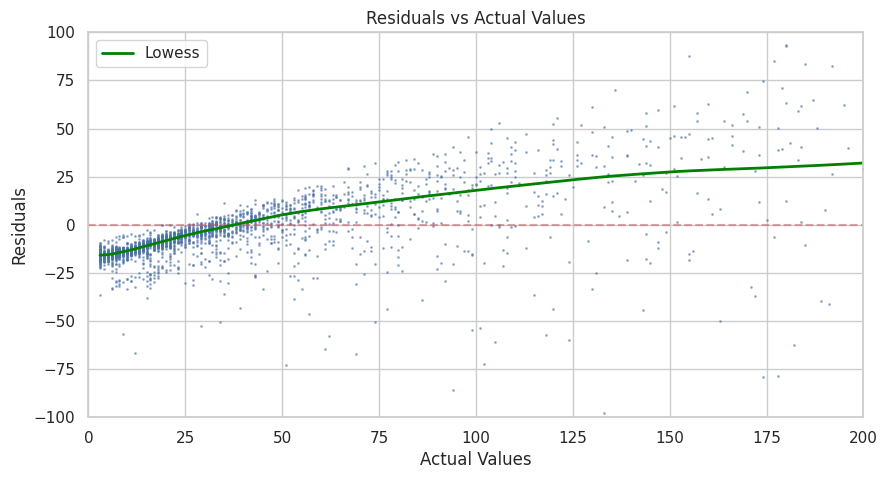

Pearson R: PearsonRResult(statistic=0.3068568364381449, pvalue=8.553812422161798e-65)


In [198]:
# plot actual values versus residuals
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(model1.resid.values, y, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([0,200])
ax.set_ylim([-100,100])
plt.title('Residuals vs Actual Values')
plt.scatter(y, model1.resid, alpha=0.5, s=1)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y, model1.resid))

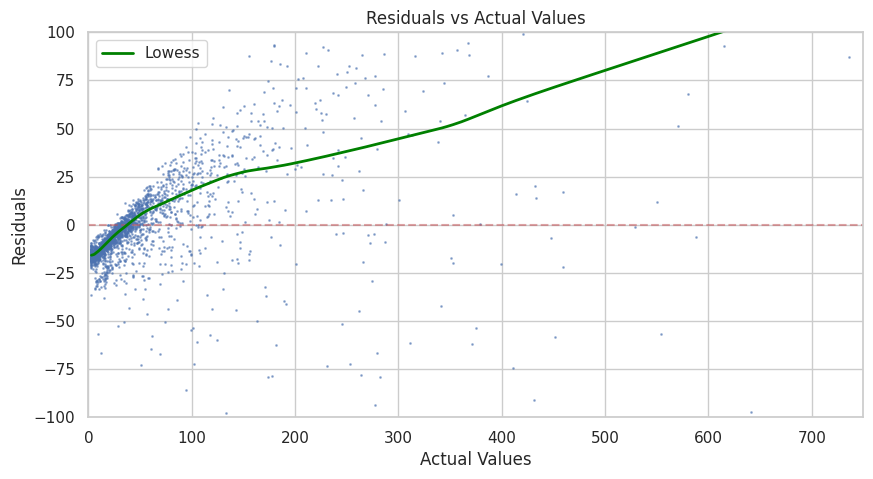

Pearson R: PearsonRResult(statistic=0.3068568364381449, pvalue=8.553812422161798e-65)


In [199]:
#Same plot from a higher view
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(model1.resid.values, y, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([0,750])
ax.set_ylim([-100,100])
plt.title('Residuals vs Actual Values')
plt.scatter(y, model1.resid, alpha=0.5, s=1)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y, model1.resid))

From the above curve we can see that the Lowess curve is below the y=0 line for lower values which mean our model is overpredicting these values and then goes to the upper side for most of the residuals are about the y=0 line which means our model is underpredicting these values !

In [200]:
result = model1

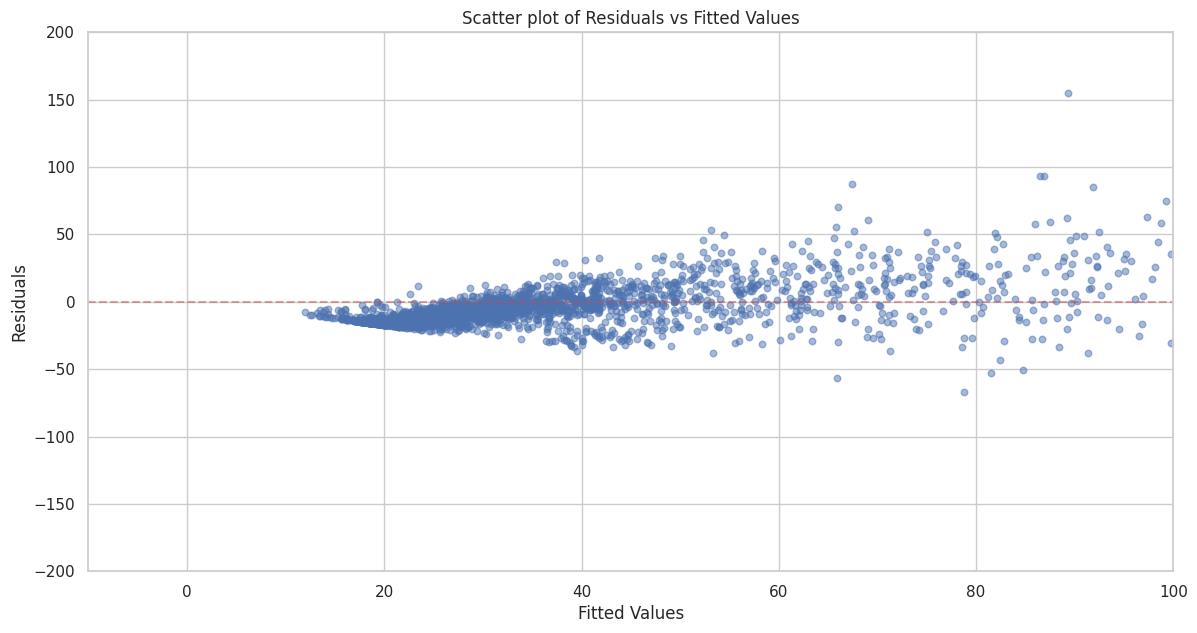

In [201]:
# plot actual values versus residuals
plt.figure(figsize=(14,7))
plt.title('Scatter plot of Residuals vs Fitted Values')
plt.scatter(y=result.resid, x=result.fittedvalues, alpha=0.5, s=22)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.xlim(-10, 100)
plt.ylim(-200, 200)
plt.show()

We observe a distinctive cone-shaped pattern in the residual plot, which is a characteristic indication of heteroscedasticity. This phenomenon implies that as the fitted values increase, the variance of the residuals also increases. Consequently, our model is significantly affected by pronounced heteroscedasticity.

Heteroscedasticity refers to a systematic alteration in the dispersion of residuals across the spectrum of observed values. The challenge arises because ordinary least squares (OLS) regression assumes a consistent variance of residuals (homoscedasticity) across the data. Heteroscedasticity, alternatively spelled heteroskedasticity, is more common in datasets that exhibit considerable variation between the smallest and largest observed values. While several factors can contribute to the existence of heteroscedasticity, a prevalent explanation is that the variability of errors changes in proportion to a certain factor. This factor might even be a variable present in the model.

Although heteroscedasticity itself does not introduce bias in the coefficient estimations, it does reduce their precision. Decreased precision elevates the likelihood of coefficient estimates deviating further from the true population values. Notably, heteroscedasticity tends to yield p-values that appear smaller than they actually should be. This discrepancy emerges because heteroscedasticity inflates the variance of coefficient estimates, yet the OLS procedure remains oblivious to this inflation. Consequently, OLS calculates t-values and F-values using an underestimated level of variance. This issue can lead to the erroneous conclusion that a particular model term holds statistical significance when, in reality, it might not be statistically significant.